In [ ]:
import pandas as pd

file_path_1 = r"C:\Users\adria\Downloads\mnist_client4_train.parquet"
file_path_2 = r"C:\Users\adria\Downloads\mnist_client4_test.parquet"
df_train = pd.read_parquet(file_path_1)
df_test = pd.read_parquet(file_path_2)

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import random

# Seed everything for reproducibility
def set_seed(seed=42):
    tf.keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()
    np.random.seed(seed)
    random.seed(seed)
    
set_seed(42)

def prepare_data(df_train, df_test):
    # Extract features (pixel values) and labels
    X_train = df_train.drop('label', axis=1).values
    y_train = df_train['label'].values
    X_test = df_test.drop('label', axis=1).values
    y_test = df_test['label'].values
    
    # Reshape to (num_samples, 28, 28, 1) and normalize
    X_train = np.expand_dims(X_train.reshape(-1, 28, 28) / 255.0, -1)
    X_test = np.expand_dims(X_test.reshape(-1, 28, 28) / 255.0, -1)
    
    return (X_train, y_train), (X_test, y_test)

def train_and_verify(model, x_train, y_train, epochs, x_test, y_test, save_name):
    print(model.summary())

    # Train the model
    history = model.fit(x_train, y_train, 
                       epochs=epochs, 
                       validation_data=(x_test, y_test))
    
    # Make predictions and print classification report
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    # Create training plots
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    # Save the model
    model.save(save_name)
    print(f"Model saved as {save_name}")


Matplotlib is building the font cache; this may take a moment.


c:\Users\adria\tf_env310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,442 (1.99 MB)

 Trainable params: 522,442 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 933s 932ms/step - accuracy: 0.8140 - loss: 0.5512 - val_accuracy: 0.9645 - val_loss: 0.1104
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.9680 - loss: 0.1130 - val_accuracy: 0.9811 - val_loss: 0.0630
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9742 - loss: 0.0890 - val_accuracy: 0.9860 - val_loss: 0.0449
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.9799 - loss: 0.0653 - val_accuracy: 0.9861 - val_loss: 0.0440
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.9819 - loss: 0.0635 - val_accuracy: 0.9880 - val_loss: 0.0374
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       790
           1       1.00      0.99      0.99       899
           2       0.99      0.97      0.98       794
           3       0.99      0.99      0.99       818
           4       0.99  

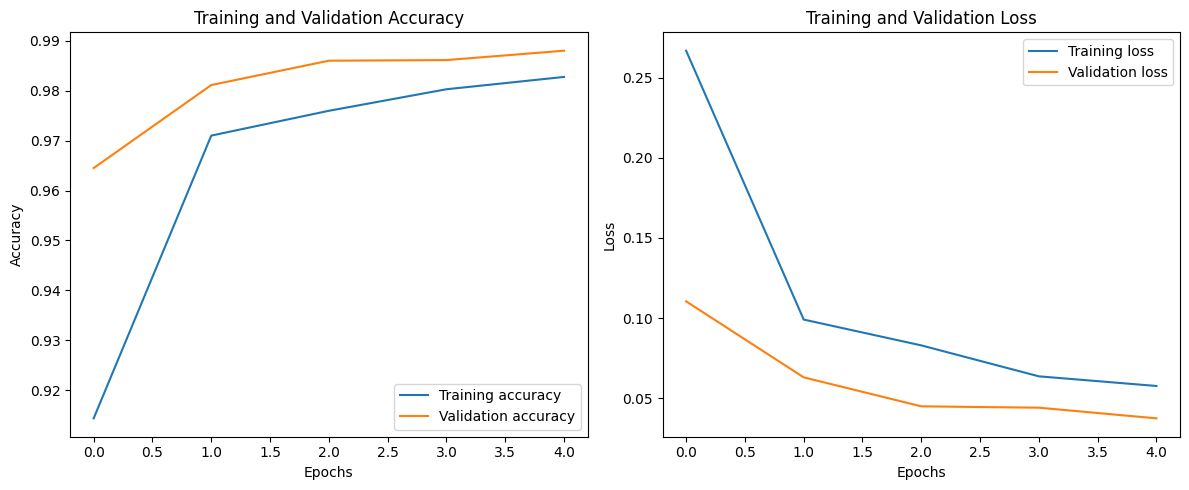

Model saved as my_model_adrian.keras


In [ ]:
from TheModel import build

# Prepare your data
train_data, test_data = prepare_data(df_train, df_test)
x_train, y_train = train_data
x_test, y_test = test_data

# Build and train a single model
model = build.build_it() 
train_and_verify(model, x_train, y_train, 5, x_test, y_test, "my_model_victor.keras")


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,567,328 (5.98 MB)

 Trainable params: 522,442 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,044,886 (3.99 MB)